In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
#from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow backend.


Using TensorFlow version 2.1.0


In [2]:
import pandas as pd

# Library
import pandas as pd
import numpy as np

# Load Data
test1 = pd.read_csv("data/banglacharactertrain1.csv")
test2 = pd.read_csv("data/banglacharactertrain2.csv")
test3 = pd.read_csv("data/bangladigittrain3.csv")

train1 = pd.read_csv("data/banglacharactertest1.csv")
train2 = pd.read_csv("data/bangladigittest2.csv")


In [3]:
#concate dataframes
train = pd.concat([train1,train2])
test= pd.concat([test1,test2,test3])

In [4]:
train.shape


(94240, 785)

In [5]:
test.shape

(89871, 785)

In [6]:
# Separating Data and Label
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

# Separating Data and Label
Y_test = test["label"]
X_test = test.drop(labels = ["label"],axis = 1)



In [7]:
# Normalize the data
##X_train = X_train / 255.0

# Reshape the array into 28 x 28 pixel
X_train = X_train.values.reshape(94240,28,28)
Y_train = Y_train.values.reshape(94240,)

#x_train_reshaped = np.reshape(X_train ,(94240,784))

# Normalize the data
##X_test = X_test / 255.0

# Reshape the array into 28 x 28 pixel
X_test = X_test.values.reshape(89871,28,28)
Y_test = Y_test.values.reshape(89871,)

#x_test_reshaped = np.reshape(X_test ,(89871,784))

x_test_reshaped = np.reshape(X_test ,(89871,28,28,1))
x_train_reshaped = np.reshape(X_train ,(94240,28,28,1))


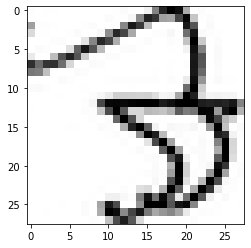

In [74]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.imshow(X_train[35001], cmap='binary')
plt.show()

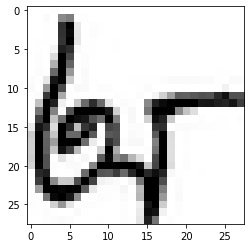

In [9]:
plt.imshow(X_test[5], cmap='binary')
plt.show()

In [10]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(Y_train)
y_test_encoded = to_categorical(Y_test)

In [11]:
y_test_encoded.shape

(89871, 122)

In [12]:
y_train_encoded.shape

(94240, 122)

In [13]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [14]:
print(set(y_train_encoded[0]))

{0.0, 1.0}


In [15]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

In [16]:
#print(set(x_train_norm[0]))

In [40]:
model = Sequential()
# model = Sequential([
#                     Dense(128,activation='relu' , input_shape=(784,)),
#                     Dense(128,activation='relu'),
#                    Dense(128,activation='relu'),
#                     Dense(122,activation='softmax')
# ])

In [41]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(122,activation='softmax'))


In [44]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#model.summary()

########################

In [45]:
history = model.fit(x_train_norm, y_train_encoded, epochs=3 , validation_data = (x_test_norm, y_test_encoded))

Train on 94240 samples, validate on 89871 samples
Epoch 1/3
94240/94240 [==============================] - 64s 678us/step - loss: 2.0476 - accuracy: 0.4779 - val_loss: 1.1928 - val_accuracy: 0.6739
Epoch 2/3
94240/94240 [==============================] - 66s 699us/step - loss: 0.6482 - accuracy: 0.8153 - val_loss: 0.8029 - val_accuracy: 0.7778
Epoch 3/3
94240/94240 [==============================] - 67s 715us/step - loss: 0.4329 - accuracy: 0.8763 - val_loss: 0.6354 - val_accuracy: 0.8250


In [46]:
model.save(r'model_hand_reco.h5')

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [48]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.6739326119422913, 0.7777703404426575, 0.8249602317810059]
The training accuracy is : [0.4778544, 0.8153226, 0.8762627]
The validation loss is : [1.1928271708789462, 0.8028588235604425, 0.6353561558808714]
The training loss is : [2.0475998101797086, 0.6482438478637834, 0.43289571361322154]


In [49]:
#loss , accuracy = model.evaluate(x_test_norm, y_test_encoded)

#print('Test set accuracy:' , accuracy*100)

In [50]:
predictions = model.predict(x_test_norm)
print(predictions.shape)

(89871, 122)


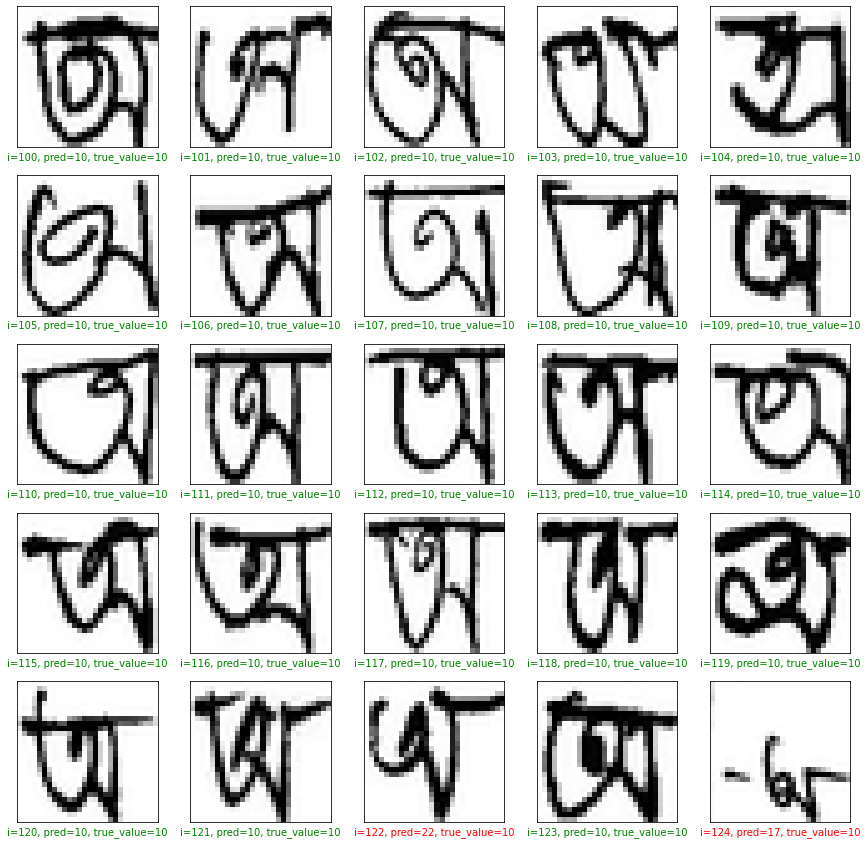

In [51]:
plt.figure(figsize=(15,15))

start_index= 100;

for i in range(25):
  plt.subplot(5 , 5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  prediction = np.argmax(predictions[start_index+i])
  true_value = Y_test[start_index+i]

  col = 'g'
  if prediction != true_value:
    col = 'r'

  plt.xlabel('i={}, pred={}, true_value={}' .format(start_index+i, prediction, true_value), color=col)
  plt.imshow(X_test[start_index+i], cmap='binary')
plt.show()

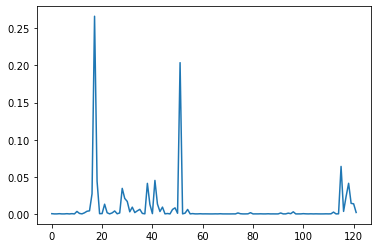

In [52]:
plt.plot(predictions[124])
plt.show()

In [53]:
prediction = np.argmax(predictions[124])

In [54]:
prediction

17

In [55]:
Y_test[124]

10

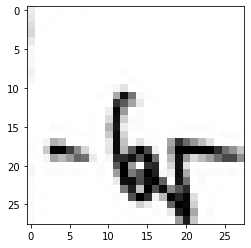

In [56]:
plt.imshow(X_test[124], cmap='binary')
plt.show()

#### predict with external image

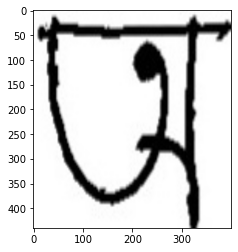

In [75]:
img = cv2.imread('data/10.jpg')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))
plt.imshow(img, cmap='binary')
plt.show()

In [76]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [77]:
img_pred = str(np.argmax(model.predict(img_final)))
cv2.putText(img, "Prediction: " + img_pred, (20,25), cv2.FONT_HERSHEY_DUPLEX, 1, color = (0,0,0))
cv2.imshow('handwritten character recognition _ _ _ ', img)

In [ ]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27: #press esc to exit
        break
cv2.destroyAllWindows()